<a href="https://colab.research.google.com/github/rahu2004/ETA-FOOT-BALL-analysis-/blob/main/regression_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **implementing the fundamentals of Linear Regression in Python on the EPL Soccer Player Dataset**



## **Project Overview**



The English Premier League is one of the world's most-watched soccer leagues, with an estimated audience of 12 million people per game.
With the substantial financial benefits, all significant teams of EPL are interested in Analytics and AI. Regarding sports analytics, machine learning and artificial intelligence (AI) have become extremely popular. The sports entertainment sector and the relevant stakeholders extensively use sophisticated algorithms to improve earnings and reduce business risk associated with selecting or betting on the wrong players.


<br>

![image](https://cdn.pixabay.com/photo/2016/04/15/20/28/football-1331838__340.jpg)

<br>


Discussing and implementing the fundamentals of Linear Regression in Python on the EPL Soccer Player Dataset.


## **Approach**

* Install Packages
* Import Libraries
* Data Reading from Different Sources
* Exploratory Data Analysis
* Correlation
* Relationship between Cost and Score
* Train - Test Split
* Linear Regression
* Model Summary
* Prediction on Test Data
* Diagnostics and Remedies

## **Install Packages**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Install required packages with versions

!pip install numpy==1.21.2 --quiet
!pip install seaborn==0.11.1 --quiet
!pip install matplotlib==3.1.1 --quiet
!pip install statsmodels==0.12.2 --quiet
!pip install pandas==1.2.4 --quiet
!pip install scipy==1.6.3 --quiet
!pip install scikit_learn==1.0.2 --quiet
!pip install projectpro --upgrade --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 81.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.4.14 requires numpy>=1.22, but you have numpy 1.21.2 which is incompatible.
jaxlib 0.4.14+cuda11.cudnn86 requires numpy>=1.22, but you have numpy 1.21.2 which is incompatible.
plotnine 0.12.3 requires numpy>=1.23.0, but you have numpy 1.21.2 which is incompatible.
scipy 1.11.2 requires numpy<1.28.0,>=1.21.6, but you have numpy 1.21.2 which is incompatible.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.21.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 18.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavio

## **Data Reading from Different Sources**

#### **1. Files**



* **Public URL**

pandas.read_csv() method also works if the data is available on any public URL.
In this case, the data is made exclusively available for users [here](https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/EPL_Soccer_MLR_LR.csv).

```
import pandas as pd

data_url="https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/EPL_Soccer_MLR_LR.csv"

df = pd.read_csv(data_url)

```

<br>


In [ ]:
#import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure
import projectpro
projectpro.checkpoint('038932')

AttributeError: ignored

In [ ]:
# Load the data as a data frame by using URL

soccer_data_url="https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/EPL_Soccer_MLR_LR.csv"
df = pd.read_csv(soccer_data_url)

In [ ]:
#view top 3 entries from the soccer data

df.head(3)

In [ ]:
df.columns

## **Exploratory Data Analysis**


In [ ]:
df.info()

There are total 202 rows and 13 columns in EPL Soccer Dataset.

Observe that there are no null values in the dataset.

Out of 13 columns 10 are float type and 1 is integer type
The remaining 2 have object dtype.


In [ ]:
# descriptive statistics

df.describe()

## **Correlation**





## **Graphs of Different Correlation Coefficients**
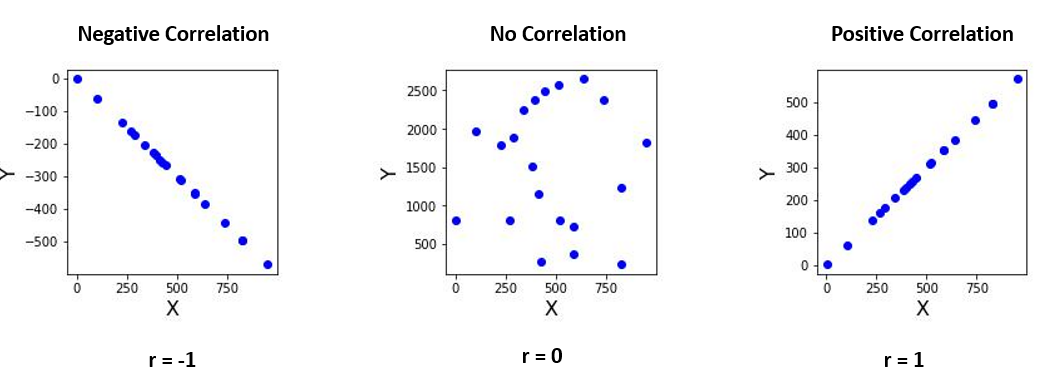

1. $r = -1$ indicates a perfect negative relationship between the variables

2. $r = 0$ indicates no relationship between the variables

3. $r = 1$ indicates a perfect positive relationship between the variables



In [ ]:
df.corr()

In [ ]:
#Let's plot cost vs. score

figure(figsize=(8, 6), dpi=80)
plt.scatter(df['Cost'], df['Score'])

# label

plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")

# Strong linear association between cost and score, maybe some concern with model after a cost of 125 or so!

projectpro.checkpoint('038932')

In [ ]:
# Assign x, y then do training testing split

x=df['Cost']
y=df['Score']

# Splitting with 75% training, 25% testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [ ]:
#statsmodels approach to regression
# fit the model
lr = sm.OLS(y_train, x_train).fit()

# Printing the parameters
lr.params
lr.summary()

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())
projectpro.checkpoint('038932')


## **Model Summary**



In [ ]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)

plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")

plt.show()

## **Prediction on Test Data**

In [ ]:
#Plot the fitted line on test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


# scatter plot on test data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Testing Data")

plt.show()
projectpro.checkpoint('038932')

Here we can see that the model has built a good regression fit as it is passing through the middle of all the points to get the minimum error.

Observe that all the data points in the test data lie in the range of the training data. This is called interpolation. What if we analyze a data point with a cost say 560? This is extrapolation and the model probably won't be robust to it.


## **Diagnostics and Remedies**





In [ ]:
#DIAGNOSTICS

#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS



#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data
figure(figsize=(8, 6), dpi=80)
plt.title(' Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, r_i)
plt.show()




#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
figure(figsize=(8, 6), dpi=80)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

#Normality plot
figure(figsize=(8, 6), dpi=80)
scipy.stats.probplot(r_i,plot=plt)

#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values

fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#Boxplot for outliers
# plot
figure(figsize=(8, 6), dpi=80)
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

projectpro.checkpoint('038932')

### **Transformations to avoid non-constant variance**



In [ ]:
#Demo of how to deal with non-constant variance through transformations

test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor in test set
figure(figsize=(8, 6), dpi=80)
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.ylabel('Residuals',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Some evidence of non-constant variance

We can see the scatter of data points increases as we increase the cost. This is evidence of Heteroscedasticity.

We'll try different transformations such as square root, log, and box-cox to see if we can introduce linearity with these transformations.

In [ ]:
#

#Try sqrt
sqrt_y=np.sqrt(y)
figure(figsize=(8, 6), dpi=80)
plt.scatter(x, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(x, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='orange');

#Overall, most satisfied with the sqrt transformation

We can observe that the square root transformation denoted by red dots gives the most linear scatter of data points. Let's try to run the linear regression model on the transformed variable and analyze the change in results.

In [ ]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())


In [ ]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")
plt.show()
projectpro.checkpoint('038932')

We extracted the linear regression coefficients and plotted the regression line on the Cost vs Score scatter plot.

In [ ]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor
figure(figsize=(8, 6), dpi=80)
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination

Here's the same exercise but for the test dataset. Observe that the range of test data is within the train data and the maximum cost is 120, hence the regression line fits in the best way possible.